In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format ='retina'
%load_ext tensorboard

In [2]:
import numpy as np
import skopt
from skopt import gp_minimize, Optimizer
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_convergence, plot_objective, plot_evaluations
from skopt.utils import use_named_args


In [3]:
hp_dict = {
    'cnn1' : 50,
    'cnn2' : 50,
    'dropout' : 0.3,
    'learning_rate' : 0.001
    }


In [4]:
list(hp_dict.values())

[50, 50, 0.3, 0.001]

In [5]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

<Figure size 432x288 with 0 Axes>

In [6]:
from skopt.benchmarks import branin as branin
from skopt.benchmarks import hart6 as hart6_

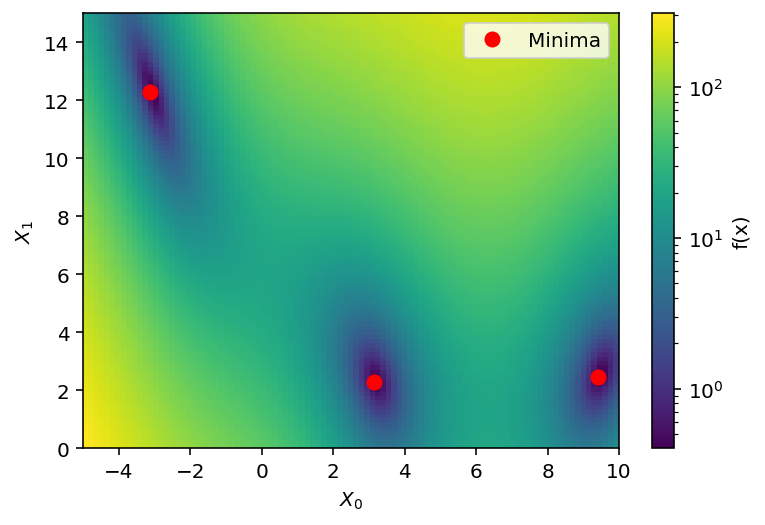

In [7]:
from matplotlib.colors import LogNorm

def plot_branin():
    fig, ax = plt.subplots()

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))
    
    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")
    
    cb = fig.colorbar(cm)
    cb.set_label("f(x)")
    
    ax.legend(loc="best", numpoints=1)
    
    ax.set_xlabel("$X_0$")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("$X_1$")
    ax.set_ylim([0, 15])
    
plot_branin()

In [8]:
from skopt.plots import plot_evaluations
from skopt import gp_minimize, forest_minimize, dummy_minimize, gbrt_minimize
from skopt.plots import plot_objective


bounds = [(-5.0, 10.0), (0.0, 15.0)]
n_calls = 150

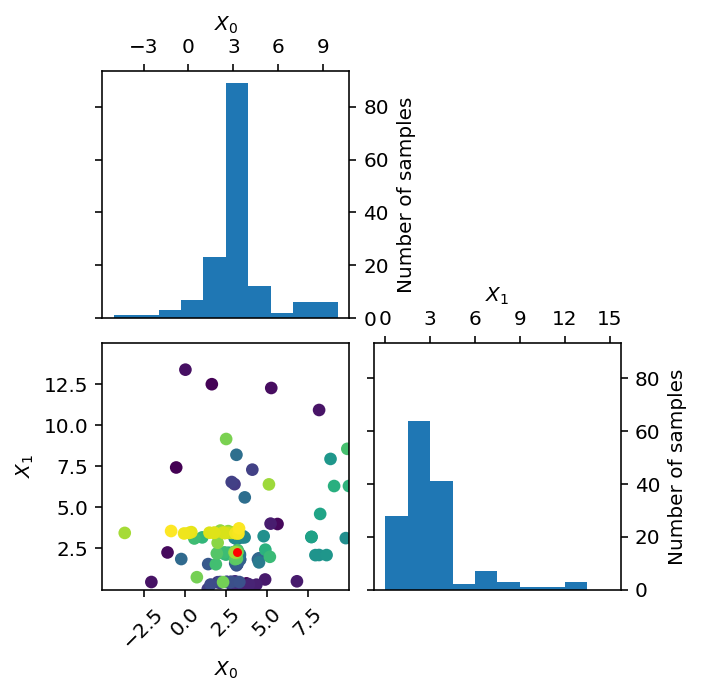

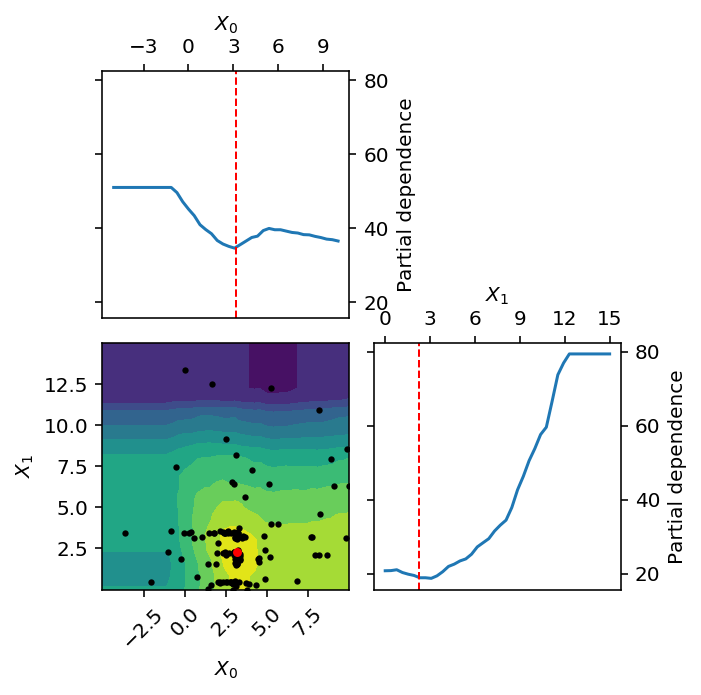

In [10]:
#%%timeit
forest_res = forest_minimize(branin, bounds, n_calls=n_calls, #base_estimator="RF",
                             n_random_starts = 10,
                             random_state=10, 
                             #acq_func='EI',
                             verbose=False)

_1 = plot_evaluations(forest_res, bins=10)
_2 = plot_objective(forest_res)

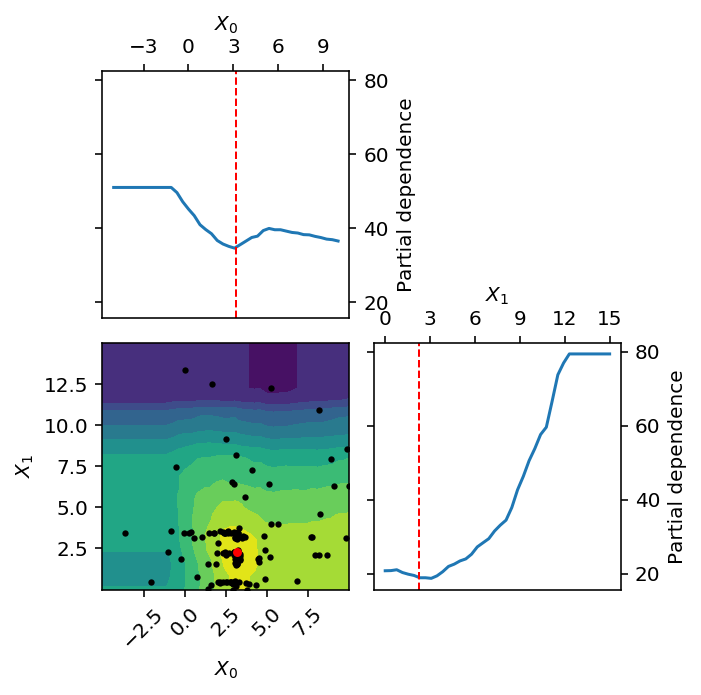

In [16]:
_2.flatten()[0].figure

In [18]:
_2.flatten()[0].figure.savefig('test.pdf',bbox_inches='tight')

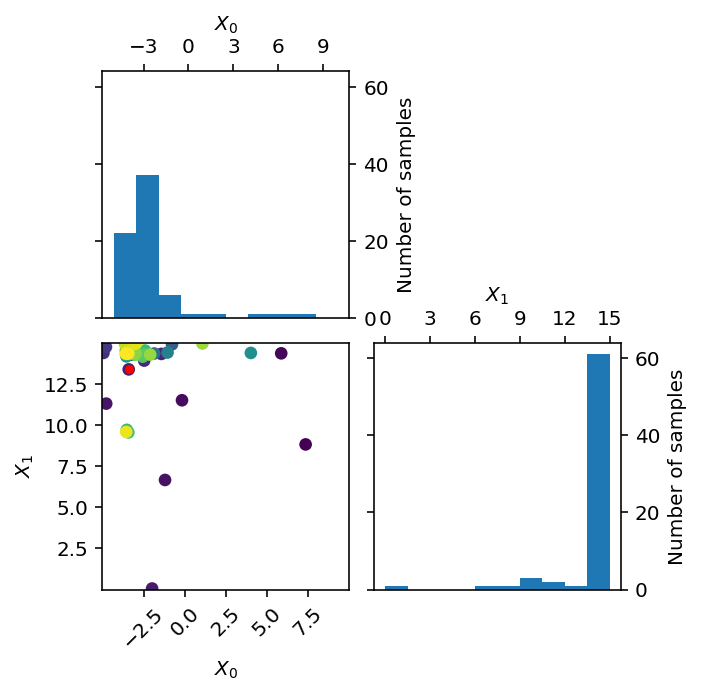

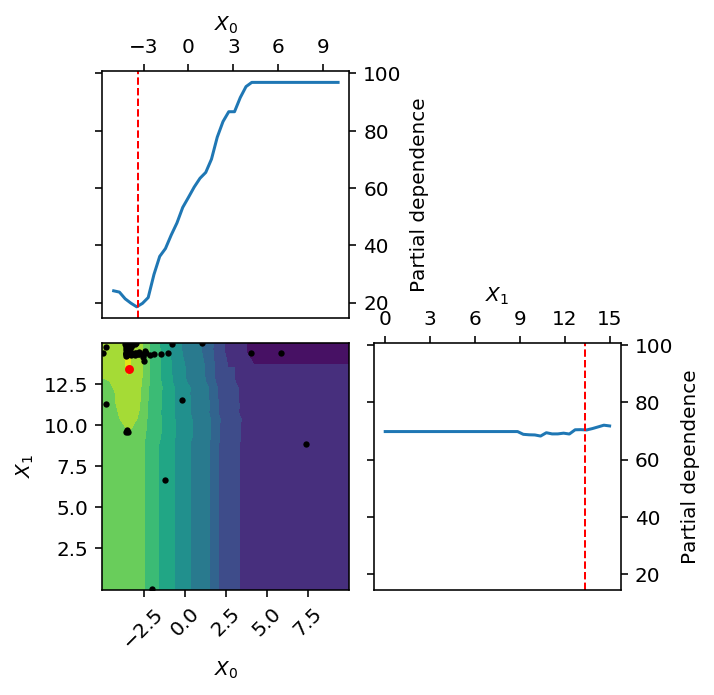

In [19]:
forest_res = forest_minimize(branin, bounds, n_calls=70, #base_estimator="RF",
                             n_random_starts = 30,
                             #random_state=10, 
                             #acq_func='EI',
                             verbose=False)

_ = plot_evaluations(forest_res, bins=10)
_ = plot_objective(forest_res)

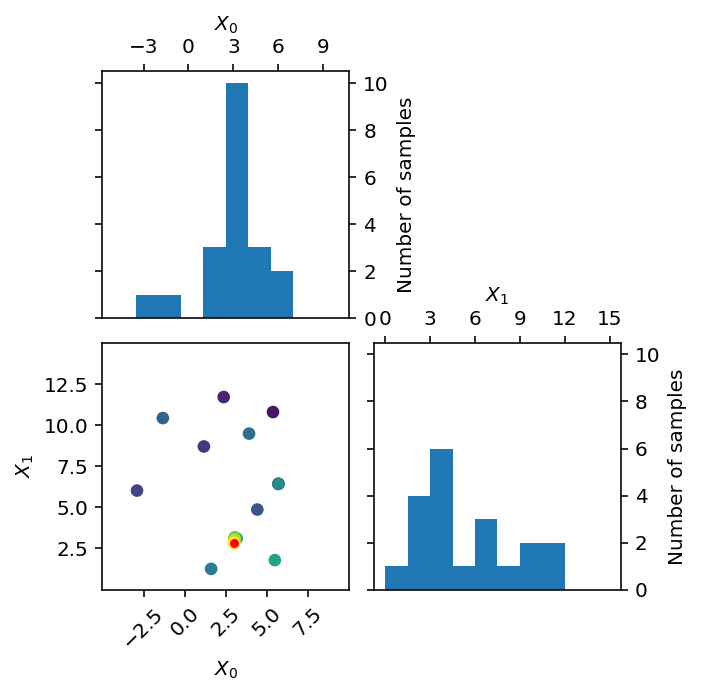

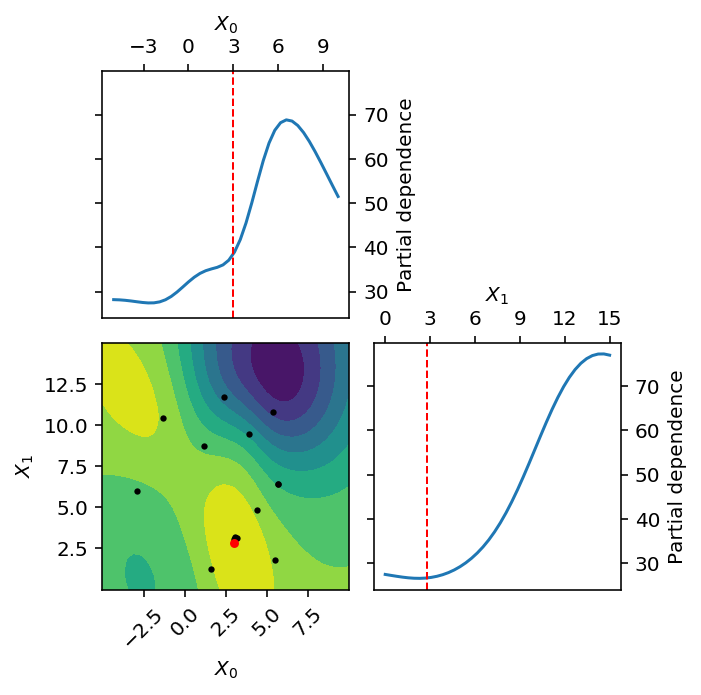

In [9]:
#%%timeit

gp_res = gp_minimize(branin, bounds, n_calls=20, #base_estimator="RF",
                    n_random_starts = 10,
                             #random_state=10, 
                             #acq_func='EI',
                             verbose=False)

_ = plot_evaluations(gp_res, bins=10)
_ = plot_objective(gp_res)

In [11]:
print(gp_res.x, gp_res.fun)

[2.996583088827407, 2.807576833706933] 0.672366106805633


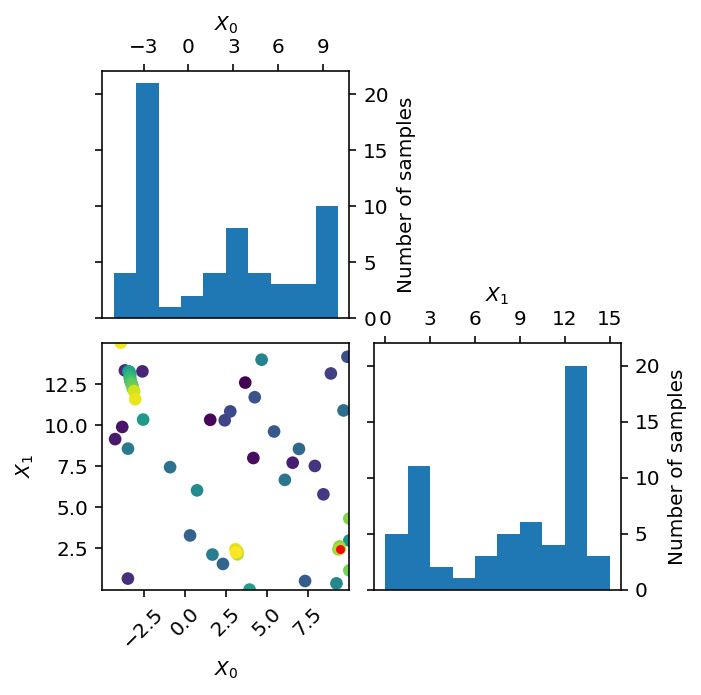

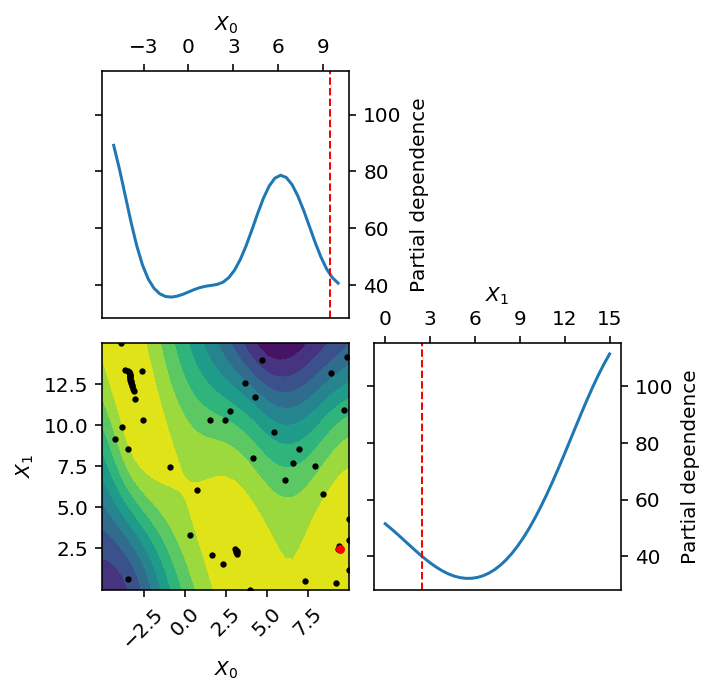

In [11]:
gp_res = gp_minimize(branin, bounds, n_calls=60, #base_estimator="RF",
                    n_random_starts = 30,
                             #random_state=10, 
                             #acq_func='EI',
                             verbose=False)

_ = plot_evaluations(gp_res, bins=10)
_ = plot_objective(gp_res)

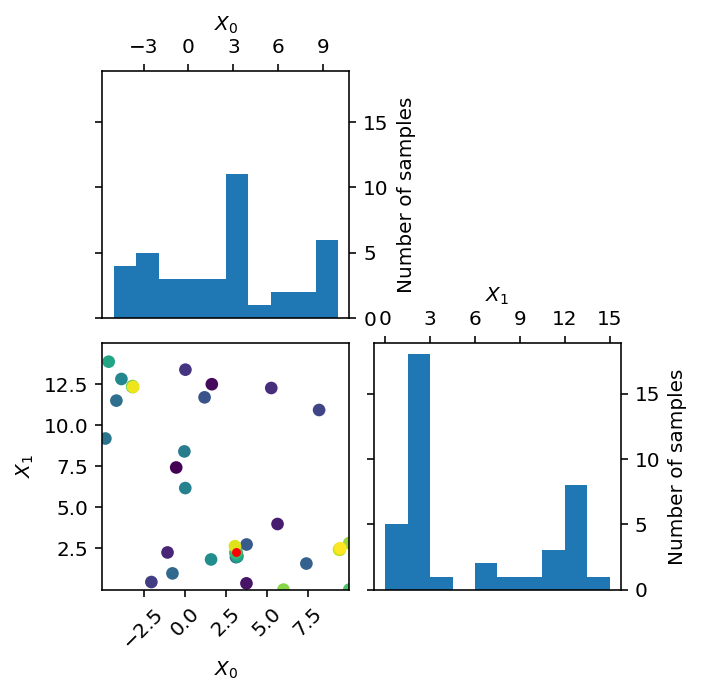

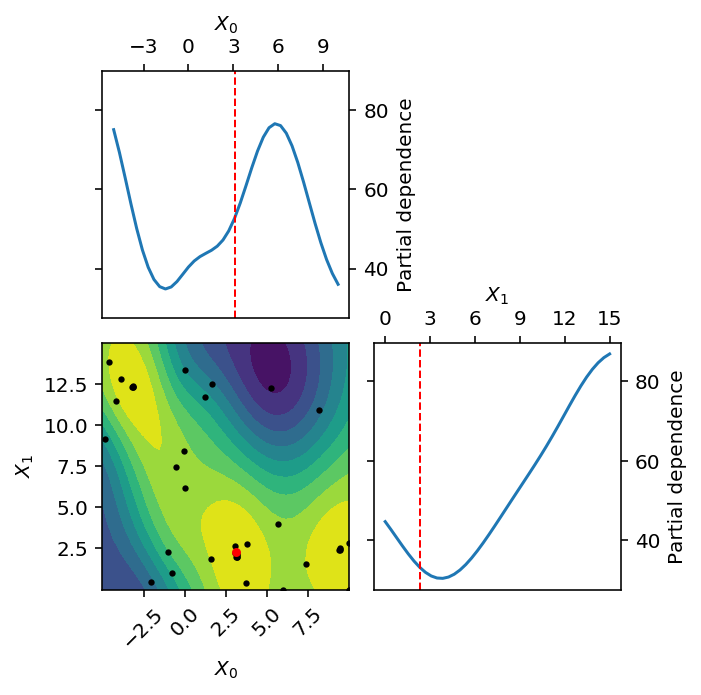

In [12]:
gp_res = gp_minimize(branin, bounds, n_calls=40, #base_estimator="RF",
                    n_random_starts = 20,
                             #random_state=10, 
                             #acq_func='EI',
                             verbose=False)

_ = plot_evaluations(gp_res, bins=10)
_ = plot_objective(gp_res)

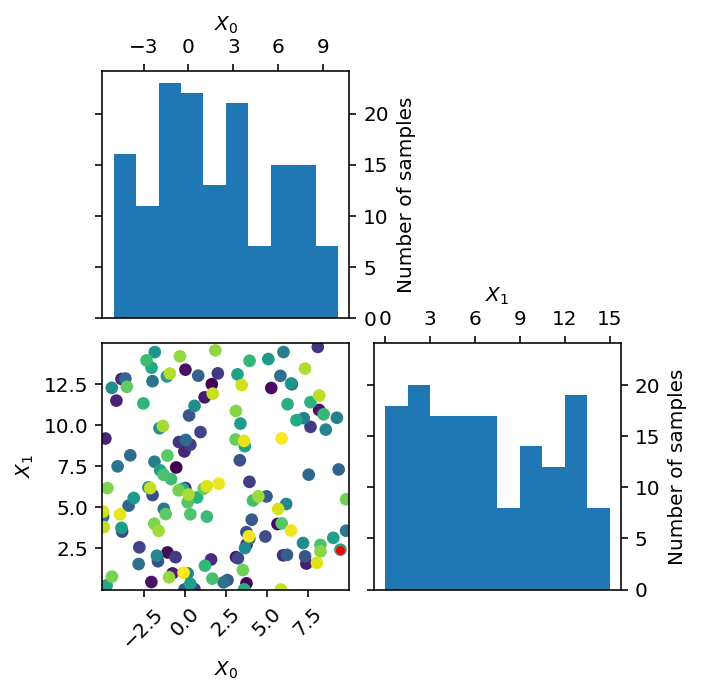

In [11]:
#%%timeit

dm_res = dummy_minimize(branin, bounds, n_calls=n_calls, #base_estimator="RF",
                        #n_random_starts = 50,
                             random_state=10, 
                             #acq_func='EI',
                             verbose=False)

_ = plot_evaluations(dm_res, bins=10)
#_ = plot_objective(dm_res)

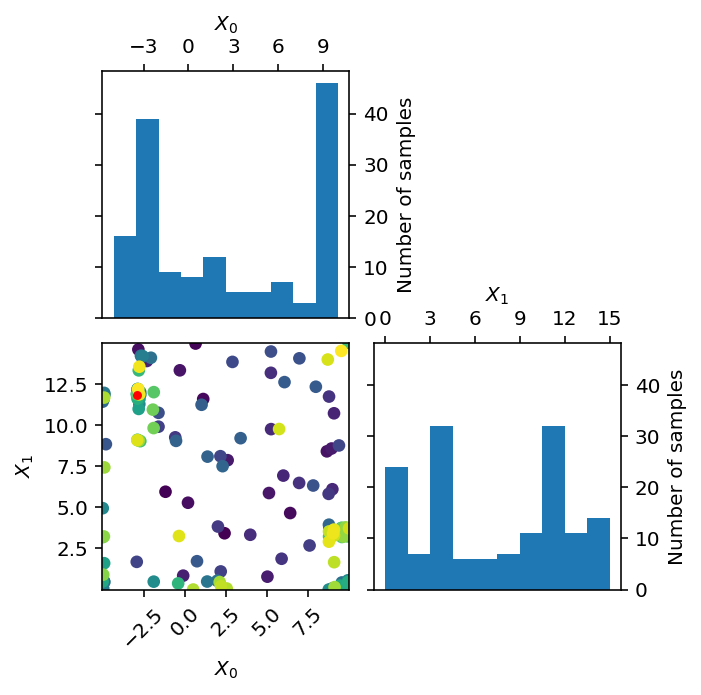

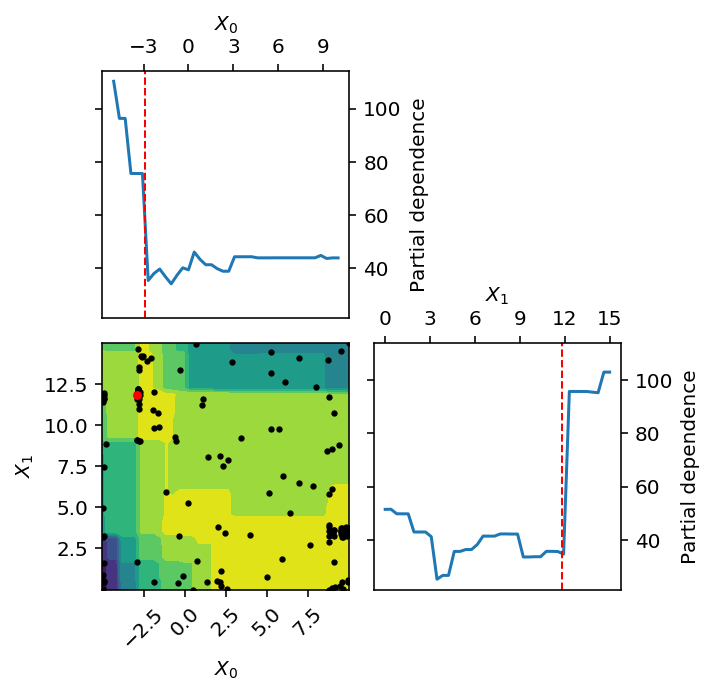

In [13]:
#%%timeit

gbrt_res = gbrt_minimize(branin, bounds, n_calls=n_calls, #base_estimator="RF",
                             random_state=50, 
                         n_random_starts = 50,
                             #acq_func='EI',
                             verbose=False)

_ = plot_evaluations(gbrt_res, bins=10)
_ = plot_objective(gbrt_res)

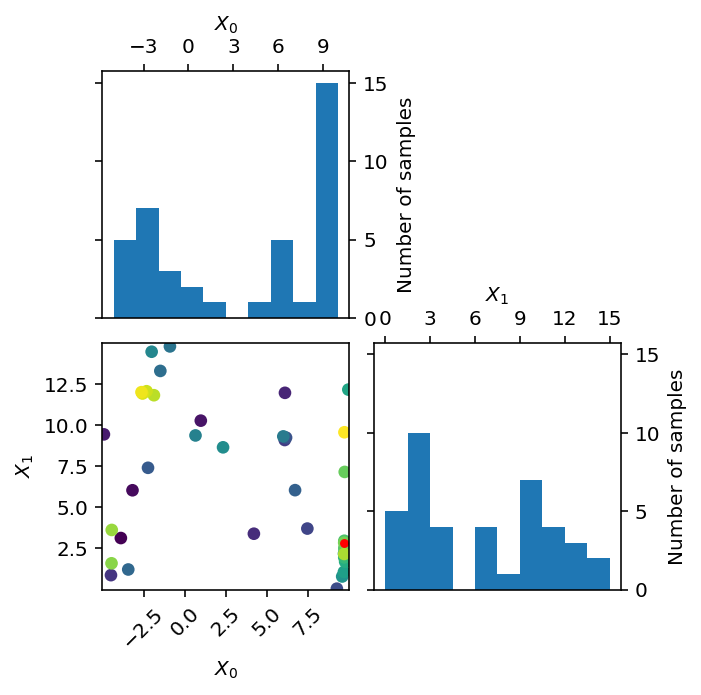

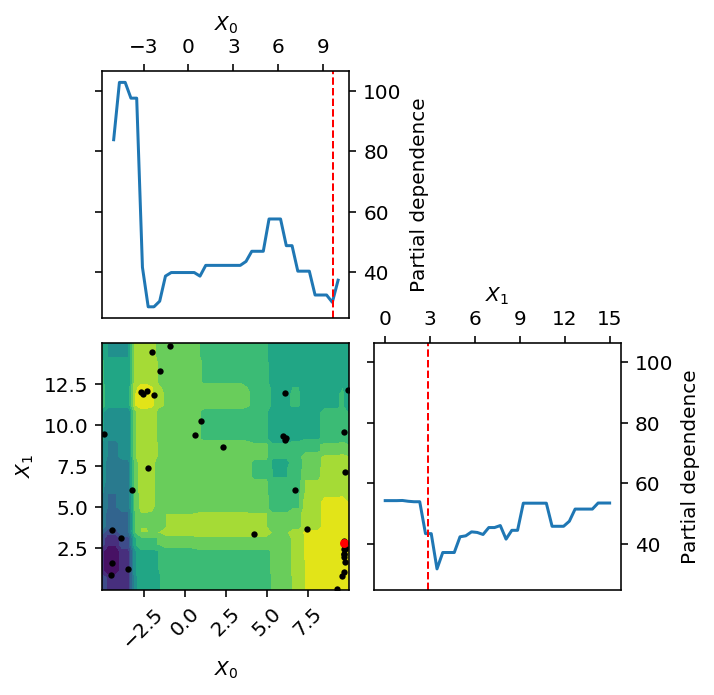

In [18]:
#%%timeit

gbrt_res = gbrt_minimize(branin, bounds, n_calls=40, #base_estimator="RF",
                             #random_state=30, 
                         n_random_starts = 20,
                             #acq_func='EI',
                             verbose=False)

_ = plot_evaluations(gbrt_res, bins=10)
_ = plot_objective(gbrt_res)

In [1]:
hp_dict = {
    'cnn1' : 50,
    'cnn2' : 50,
    'dropout' : 0.3,
    'learning_rate' : 0.001
    
    
}

In [2]:
hp_dict.items()

dict_items([('cnn1', 50), ('cnn2', 50), ('dropout', 0.3), ('learning_rate', 0.001)])

In [31]:
tmp={}


AttributeError: 'dict' object attribute 'keys' is read-only